# FFT Noise reduction demo
This is a demo of the Fast Fourier Transform method for reducing noise from data.
In this demo we:
* Generate clean data by combining wave functions
* Add noise to the clean data to generate the input data
* Deconstruct the data info frequencies
* Only select frequencies above a threshold
* Generate filtered data by using the frequencies that pass the threshold
* Compare filtered data with clean data, & calculate the error

In [1]:
from datetime import datetime
from typing import List, Tuple
import random

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

In [2]:
# The avg magnatude of noise added to the clean data
added_nose_factor = 2.5

# Number of wave functions (sin / cos alternating) that are used for generating clean data
number_of_wave_functions = 2

# Threshold for filtering data from noise
threshold = 100

# How many values of the function to use
data_points = 1024

points_to_plot = 200

# Generate data & add noise to it

Text(0, 0.5, 'Value')

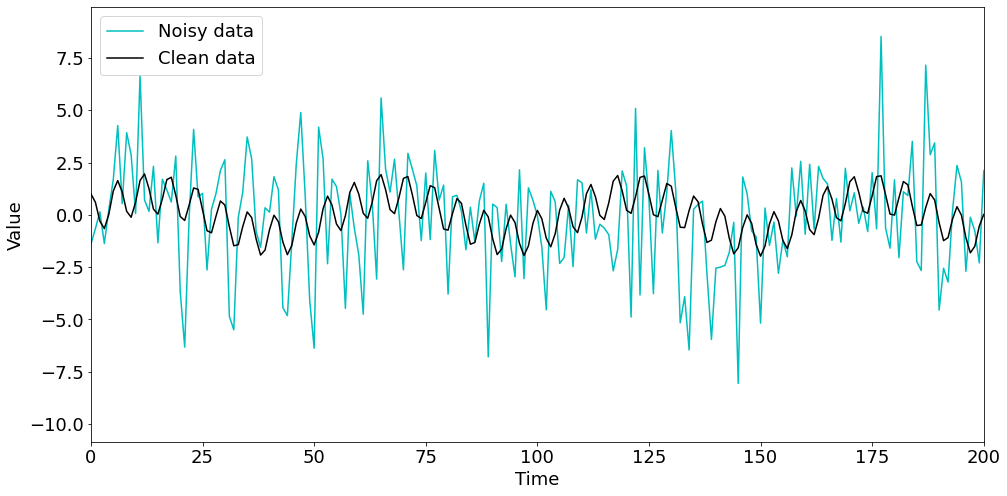

In [3]:
# Generate clean data & add noise to it
timestamps = np.arange(0, data_points)

# An array of values. this is the clean data that we want to find
clean_data = timestamps * 0
for i in range(number_of_wave_functions):
    frequency = random.randint(1, 200)
    if i % 2 == 0:
        clean_data = clean_data + np.sin(2 * np.pi * frequency * timestamps / len(timestamps))
    else:
        clean_data = clean_data + np.cos(2 * np.pi * frequency * timestamps / len(timestamps))
data = clean_data + added_nose_factor * np.random.randn(len(timestamps))

plt.plot(timestamps, data, color='c', linewidth=1.5, label='Noisy data')
plt.plot(timestamps, clean_data, color='k', linewidth=1.5, label='Clean data')
plt.xlim(timestamps[0], timestamps[points_to_plot])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")

# Use FFT to detect dominent frequencies in noisy data

c:\users\sagiv\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


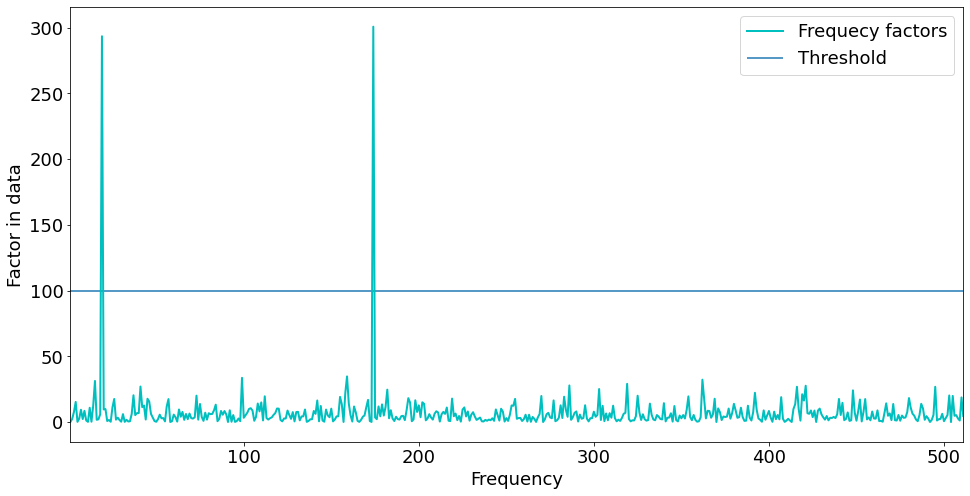

In [4]:
# Extract frequencies from raw data
n = len(timestamps)
fhat = np.fft.fft(data, n)
PSD = fhat * np.conj(fhat) / n
frequencies = np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

plt.plot(frequencies[L], PSD[L], color='c', linewidth=2, label='Frequecy factors')
plt.xlim(frequencies[L[0]], frequencies[L[-1]])
plt.xlabel("Frequency")
plt.ylabel("Factor in data")

plt.hlines(threshold, frequencies[L[0]], frequencies[L[-1]], colors=None, label='Threshold')
plt.legend()

# Use dominent frequencies to generate filtered data

c:\users\sagiv\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


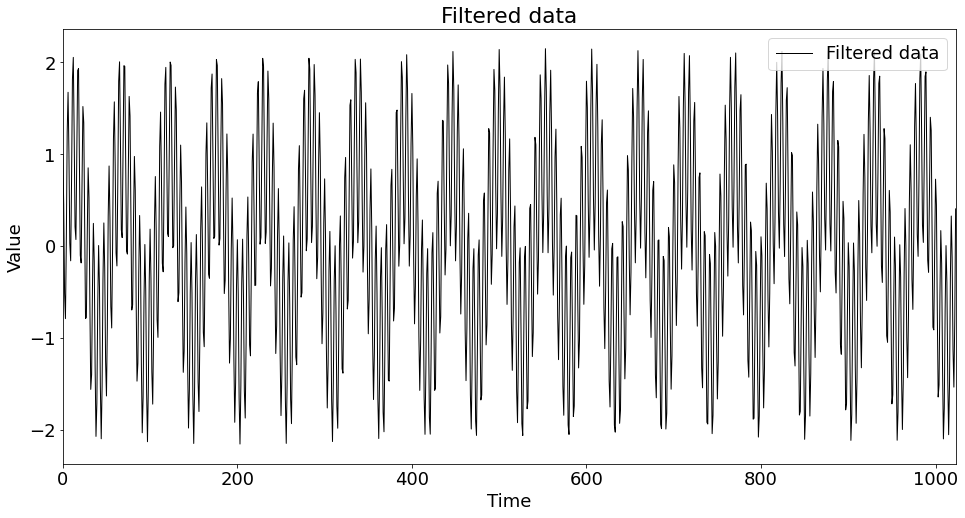

In [5]:
# Generate filtered version of data based on threshold

indices = PSD > threshold

filtered_PSD = PSD * indices
filtered_fhat = fhat * indices
filtered_data = np.fft.ifft(filtered_fhat)

plt.title("Filtered data")
plt.plot(timestamps, filtered_data, color='k', linewidth=1, label='Filtered data')
plt.xlim(timestamps[0], timestamps[-1])
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

# Use the non dominent frequencies to extract noise from data

c:\users\sagiv\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


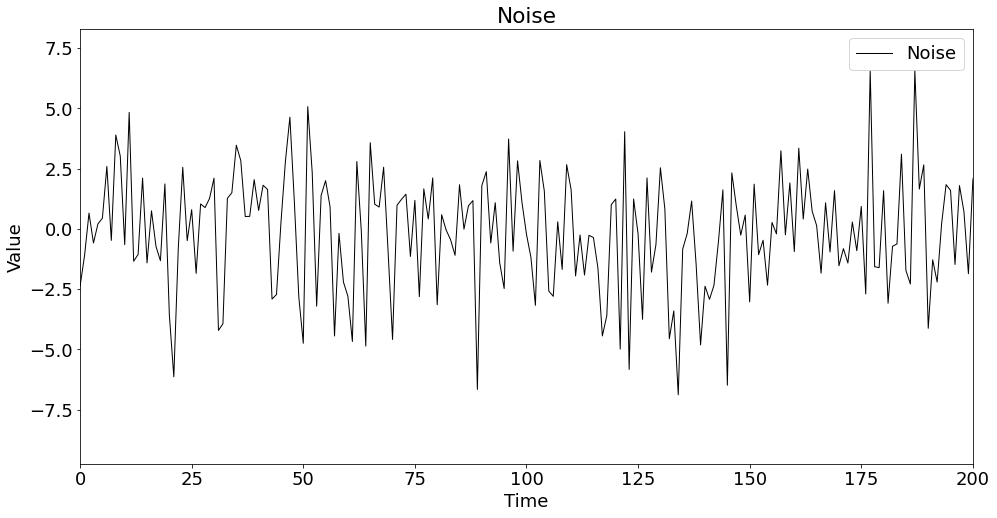

In [6]:
# Extract noise from data
inverted_indices = PSD <= threshold

noise_PSD = PSD * inverted_indices
noisy_fhat = fhat * inverted_indices
noisy_data = np.fft.ifft(noisy_fhat)

plt.title("Noise")
plt.plot(timestamps, noisy_data, color='k', linewidth=1, label='Noise')
plt.xlim(timestamps[0], timestamps[points_to_plot])
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

# Plot original (noisy) data & filtered data together

c:\users\sagiv\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


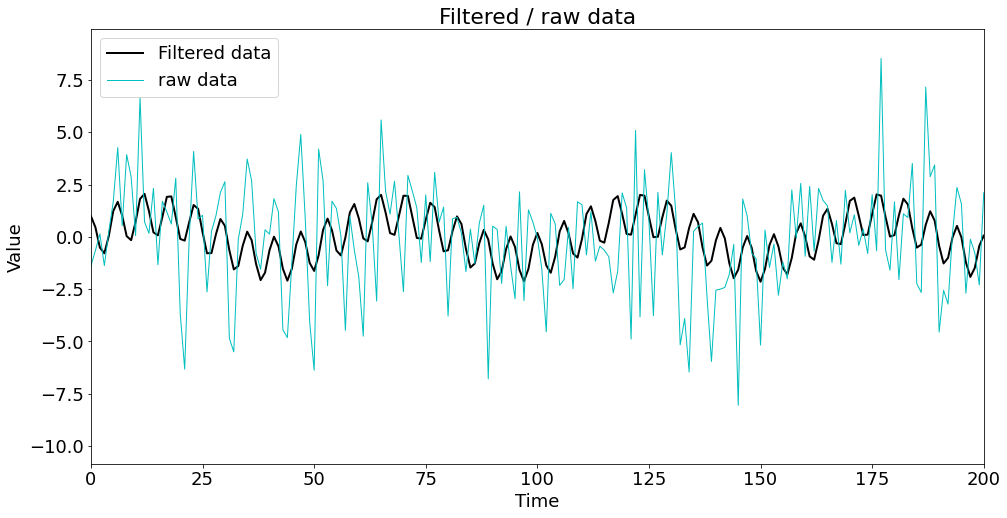

In [7]:
plt.title("Filtered / raw data")
plt.plot(timestamps, filtered_data, color='k', linewidth=2, label='Filtered data')
plt.plot(timestamps, data, color='c', linewidth=1, label='raw data')
plt.xlim(timestamps[0], timestamps[points_to_plot])
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

# Calc the error between the clean data & the filtered data

basically how good are we in extreacting the actual data from the raw noisy data

c:\users\sagiv\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


0.10270721119215047


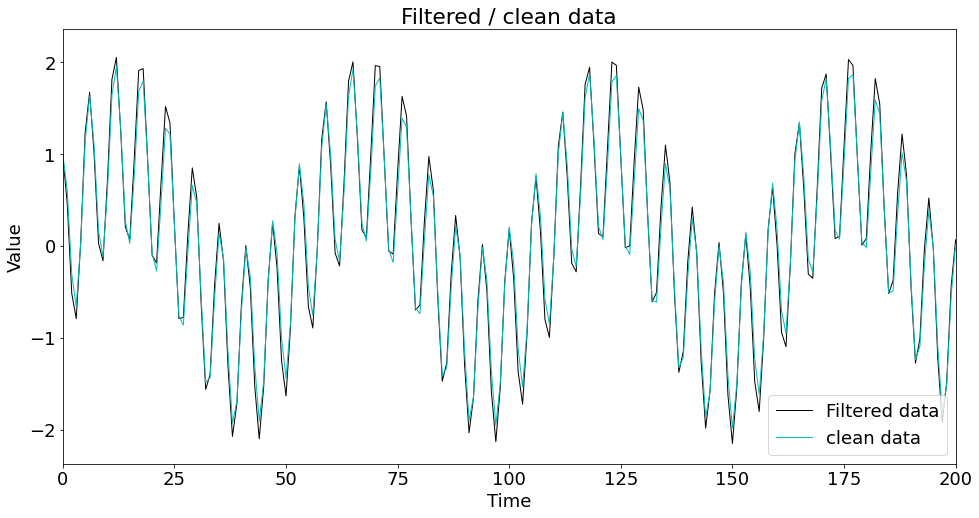

In [8]:
# Calculate the error between clean data & filtered data

plt.title("Filtered / clean data")
plt.plot(timestamps, filtered_data, color='k', linewidth=1, label='Filtered data')
plt.plot(timestamps, clean_data, color='c', linewidth=1, label='clean data')
plt.xlim(timestamps[0], timestamps[points_to_plot])
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

error = 0
for timestamp in timestamps:
    error += abs(clean_data[timestamp] - filtered_data[timestamp])
error = error / len(timestamps)
print(error)